In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('../data/ratings_sample.tsv', sep='\t')

In [3]:
data.columns

Index(['like', 'player_id', 'subject_id', 'player_age', 'player_height',
       'player_age_max', 'player_age_min', 'player_distance_max',
       'player_height_min', 'player_height_max', 'subject_age',
       'subject_height', 'subject_age_max', 'subject_age_min',
       'subject_distance_max', 'subject_height_min', 'subject_height_max',
       'player_gender_orientation', 'player_hometown', 'player_metro',
       'player_location', 'subject_gender_orientation', 'subject_hometown',
       'subject_metro', 'subject_location', 'distance', 'player_saved',
       'player_rated', 'subject_saved', 'subject_rated'],
      dtype='object')

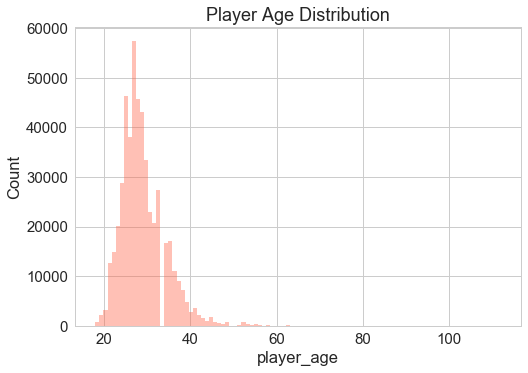

In [4]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(data["player_age"].dropna(),
                 bins=100,
                 kde=False,
                 color="tomato")
    sns.plt.title("Player Age Distribution")
    plt.ylabel("Count")

Normalize the outliers for player age

In [5]:
data.loc[data.player_age < 18,"player_age"]  = data.loc[(data.player_age >= 18) & (data.player_age <= 30),"player_age"].mean(skipna=True)
data.loc[data.player_age > 100,"player_age"] = data.loc[(data.player_age >= 30) & (data.player_age <= 100),"player_age"].mean(skipna=True)
data["player_age"].fillna(data["player_age"].mean(),inplace=True)
data["player_age"] = data["player_age"].astype(int)

Histogram after player age normalization

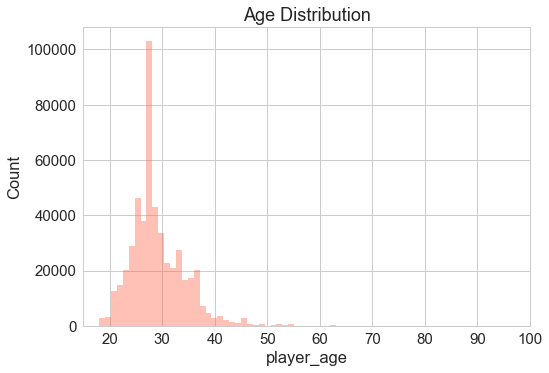

In [7]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(data["player_age"].dropna(),
                 bins=40,
                 kde=False,
                 color="tomato")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100))

In [8]:
unique_player_metros = data['player_metro'].unique()
print(unique_player_metros)

['Toronto' 'New_York_City' 'Other']


In [9]:
unique_subject_metros = data['subject_metro'].unique()
print(unique_subject_metros)

['Charlotte' 'Orlando' 'Los_Angeles' 'New_York_City' 'Detroit' 'Boston'
 'London' 'Other' 'San_Francisco' 'Seattle' 'Mumbai' 'Chicago' 'Raleigh'
 'New_Orleans' 'Atlanta' 'Portland' 'Columbus' 'Denver' 'Philadelphia'
 'Miami' 'Cincinnati' 'Cleveland' 'Houston' 'Toronto' 'Austin_San_Antonio'
 'Washington_D.C.' 'Phoenix' 'Sydney' 'Dallas' 'Jacksonville'
 'Indianapolis' 'Madison' 'San_Diego' 'Tampa' 'Pittsburgh' 'Omaha'
 'Nashville' 'St._Louis' 'Rochester' 'Virginia_Beach' 'Delhi'
 'Minneapolis_St._Paul' 'Albany' 'Brisbane' 'Salt_Lake_City' 'Melbourne'
 'Las_Vegas' 'Kansas_City' 'Bengaluru' 'Louisville' 'Buffalo' 'Montreal'
 'Vancouver' 'Bristol' 'Calgary' 'Manchester' 'Oklahoma_City' 'Charleston']


In [10]:
unique_player_location = data['player_location'].unique()
print(unique_player_location)

['Entertainment_District' 'High_Park_North' 'CityPlace' 'Streetsville'
 'Wellington_Place' 'Richmond_Hill' 'West_Don_Lands' 'Trinity_-_Bellwoods'
 'Willowdale' 'Mississauga' 'Little_Italy' 'Financial_District'
 'Christie_Pits' 'Bloorcourt_Village' 'Yonge_and_Eglinton' 'Davisville'
 'Beverley_Glen' 'Roncesvalles_Village' 'Summerhill' 'The_Beach'
 'Downtown_Yonge' 'Richview' 'Markham' 'Yorkville' 'Beaconsfield_Village'
 'Maple' 'Queen_Street_West' 'Liberty_Village' 'Downtown'
 'Fashion_District' 'Lytton_Park' 'Palmerston' 'Thornhill'
 'Wallace_Emerson' 'The_Kingsway' 'Little_Portugal'
 'Bayview_Woods_-_Steeles' 'Cedarvale' 'Kensington_Market'
 'King_West_Village' 'University' 'The_Annex' 'Scarborough_City_Centre'
 'West_Queen_West' 'Seven_Oaks' 'Pickering' 'Clarkson' 'Dufferin_Grove'
 'Leaside' 'Bay_Cloverhill' 'Greektown' 'Cliffside' 'North_York'
 'St._James_Town' 'Forest_Hill_North' 'Mount_Pleasant_West' 'Casa_Loma'
 'Niagara' 'Riverdale' 'Deer_Park' 'Baldwin_Village' 'Parkdale'
 'The_

In [11]:
unique_subject_location = data['subject_location'].unique()
print(unique_subject_location)

['Piper_Glen_Estates' 'Casselberry' 'West_Puente_Valley' ..., 'Fort_Erie'
 'Humewood' 'West_Deane_Park']


In [12]:
unique_subject_metro_likes = data.groupby(['subject_metro'])['like'].agg(['count'])
print((unique_subject_metro_likes))

                       count
subject_metro               
Albany                    36
Atlanta                  273
Austin_San_Antonio       236
Bengaluru                  4
Boston                   441
Brisbane                   1
Bristol                    3
Buffalo                28184
Calgary                  191
Charleston                26
Charlotte                 23
Chicago                  685
Cincinnati                46
Cleveland                322
Columbus                  59
Dallas                   395
Delhi                     19
Denver                   149
Detroit                  409
Houston                  458
Indianapolis              18
Jacksonville              37
Kansas_City                3
Las_Vegas                145
London                  1809
Los_Angeles             3420
Louisville                39
Madison                   13
Manchester                28
Melbourne                  1
Miami                     82
Minneapolis_St._Paul     555
Montreal      

In [23]:
unique_subject_metro_likes = unique_subject_metro_likes.reset_index()
unique_subject_metro_likes['subject_metro'] = unique_subject_metro_likes['subject_metro'].astype('str')

Subject Age Histogram

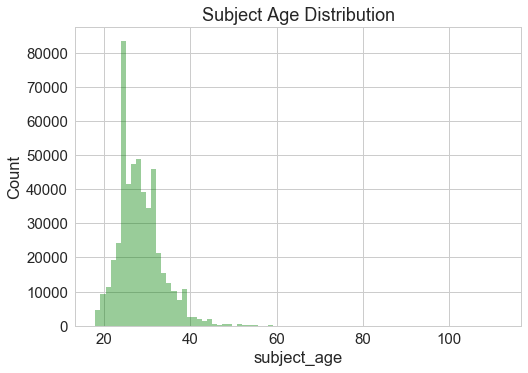

In [13]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(data["subject_age"].dropna(),
                 bins=80,
                 kde=False,
                 color="green")
    sns.plt.title("Subject Age Distribution")
    plt.ylabel("Count")

Player Height Histogram

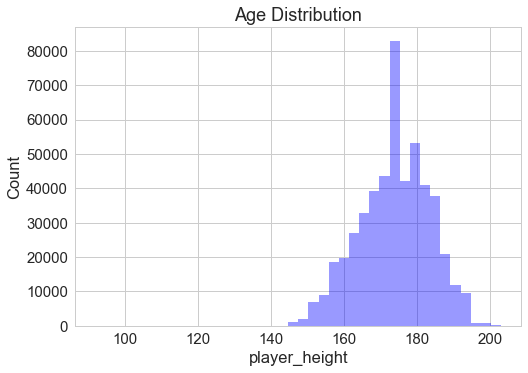

In [14]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(data["player_height"].dropna(),
                 bins=40,
                 kde=False,
                 color="blue")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")

Player Age Minimum Histogram

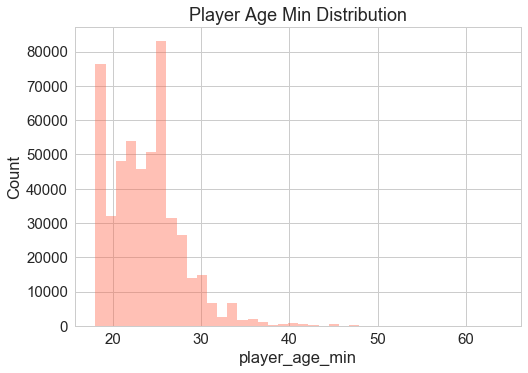

In [18]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(data["player_age_min"].dropna(),
                 bins=40,
                 kde=False,
                 color="tomato")
    sns.plt.title("Player Age Min Distribution")
    plt.ylabel("Count")

Player Age Max Histogram

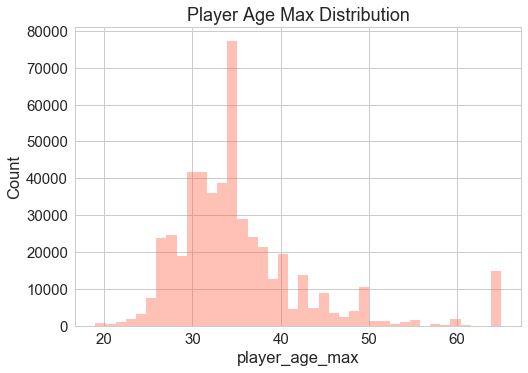

In [19]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(data["player_age_max"].dropna(),
                 bins=40,
                 kde=False,
                 color="tomato")
    sns.plt.title("Player Age Max Distribution")
    plt.ylabel("Count")

Subject Age Min Distribution

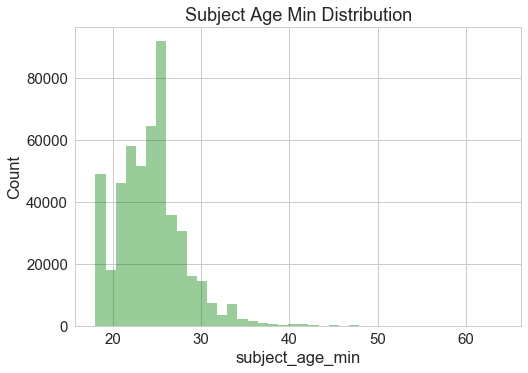

In [20]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(data["subject_age_min"].dropna(),
                 bins=40,
                 kde=False,
                 color="green")
    sns.plt.title("Subject Age Min Distribution")
    plt.ylabel("Count")

Subject Age Max Distribution

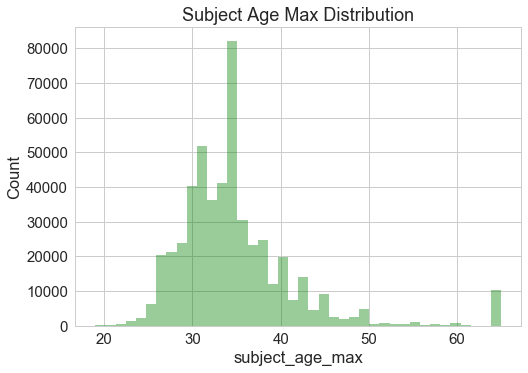

In [21]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(data["subject_age_max"].dropna(),
                 bins=40,
                 kde=False,
                 color="green")
    sns.plt.title("Subject Age Max Distribution")
    plt.ylabel("Count")

Distance Distribution

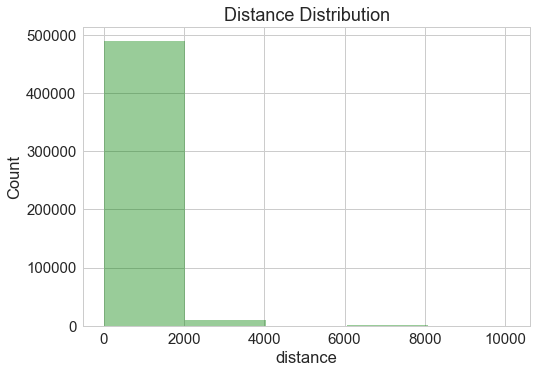

In [22]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(data["distance"].dropna(),
                 bins=5,
                 kde=False,
                 color="green")
    sns.plt.title("Distance Distribution")
    plt.ylabel("Count")

<p>Calculate the ratio of likes by player</p>
<p>Calculate the unique players & subjects</p>
<p>Assign median value of likes ratio to players that have played less than median players</p>

In [24]:
player_likes = data.groupby(['player_id'])['like'].agg(['count','sum'])

In [25]:
unique_players = data['player_id'].unique()
print(len(unique_players))

2762


In [26]:
unique_subjects = data['subject_id'].unique()
print(len(unique_subjects))

19942


In [27]:
player_likes['likes_ratio'] = player_likes['sum']/player_likes['count']

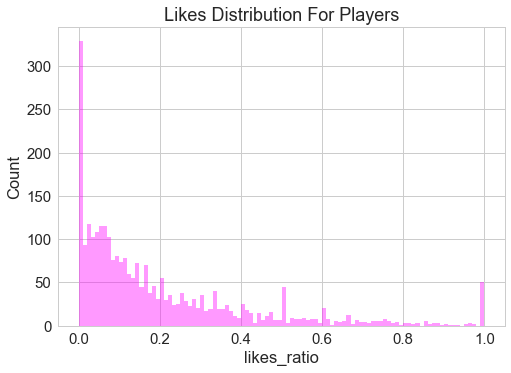

In [28]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(player_likes["likes_ratio"].dropna(),
                 bins=100,
                 kde=False,
                 color="magenta")
    sns.plt.title("Likes Distribution For Players")
    plt.ylabel("Count")

In [29]:
player_likes_median = player_likes['count'].median()

In [30]:
player_likes_median_likes_ratio = player_likes['likes_ratio'].median()
print(player_likes_median_likes_ratio)

0.11764705882352941


In [31]:
player_likes_1_ratio = player_likes[(player_likes['likes_ratio'] > 0.9) & (player_likes['count'] > player_likes_median)]

In [32]:
player_likes.loc[((player_likes['likes_ratio'] > 0.9) & (player_likes['count'] < player_likes_median)), 'likes_ratio'] = player_likes_median_likes_ratio

In [33]:
player_likes = player_likes[['likes_ratio']]

<p> Look at the distance distribution for liking/ not liking a subject </p>

In [38]:
player_distance_likes = data[data['like'] > 0]
player_distance_likes = player_distance_likes[['distance']]

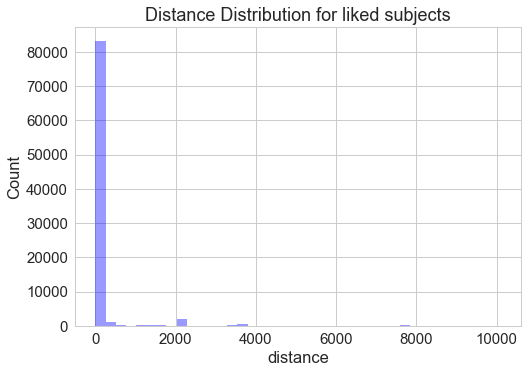

In [39]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(player_distance_likes["distance"].dropna(),
                 bins=40,
                 kde=False,
                 color="blue")
    sns.plt.title("Distance Distribution for liked subjects")
    plt.ylabel("Count")

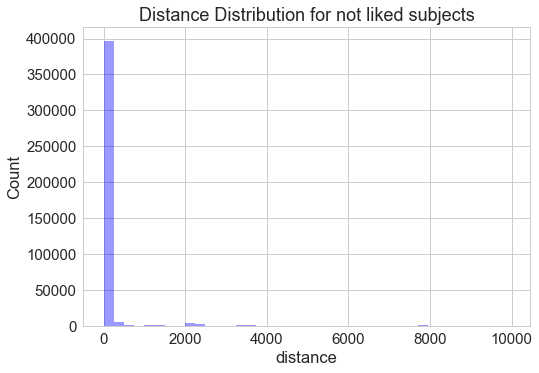

In [40]:
player_distance_not_likes = data[data['like'] < 1]
player_distance_not_likes = player_distance_not_likes[['distance']]
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(player_distance_not_likes["distance"].dropna(),
                 bins=40,
                 kde=False,
                 color="blue")
    sns.plt.title("Distance Distribution for not liked subjects")
    plt.ylabel("Count")

<p>Find gender orientations and get the ratio of likes by player gender orientation</p>

In [41]:
player_genders = data['player_gender_orientation'].unique()
print(len(player_genders))
print(player_genders)

6
['FS' 'MS' 'MG' 'FG' 'FB' 'MB']


In [42]:
player_likes_by_gender = data.groupby(['player_gender_orientation'])['like'].agg(['count','sum'])
player_likes_by_gender['ratio'] =  player_likes_by_gender['sum']/player_likes_by_gender['count']
print(player_likes_by_gender)

                            count      sum     ratio
player_gender_orientation                           
FB                           5910    472.0  0.079865
FG                           1051    116.0  0.110371
FS                         193441  14954.0  0.077305
MB                            146     13.0  0.089041
MG                           1973    373.0  0.189052
MS                         298242  71971.0  0.241317


In [43]:
player_likes_by_gender = player_likes_by_gender[['ratio']]

<p> Merging the likes ratio and the gender ratio to create a new dataset </p>

In [44]:
data_merge_one = pd.merge(data, player_likes_by_gender, left_on='player_gender_orientation', right_index=True, how='inner')

In [45]:
data_merge_two = pd.merge(data_merge_one, player_likes, left_on='player_id', right_index=True, how='inner')

In [46]:
data_merge_two.to_csv('../data/processed_data.csv')